<a href="https://colab.research.google.com/github/pdushie/BirthdayApp/blob/main/Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install ydata-profiling package

In [2]:
%pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=022ca60fc26b4a151ba8da1bd2aac07a201701031641fe725dba7707382ef335
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


## Install and upgrade plotly

In [3]:
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import all required libraries

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

## Load Dataset and display first few rows of data
#### Data Source: https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset

In [33]:
url='https://raw.githubusercontent.com/NSCC-ITC-Winter2024-DBAS5125-700-MCr/assignment-1-pdushie/main/abalone.csv?token=GHSAT0AAAAAACMXBVWHQSD6O5O7XSFXGOQUZPCD6KQ'
df = pd.read_csv(url)

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


>#### Do a count plot to see the ring distribution per ring class/category

<Axes: xlabel='Rings', ylabel='count'>

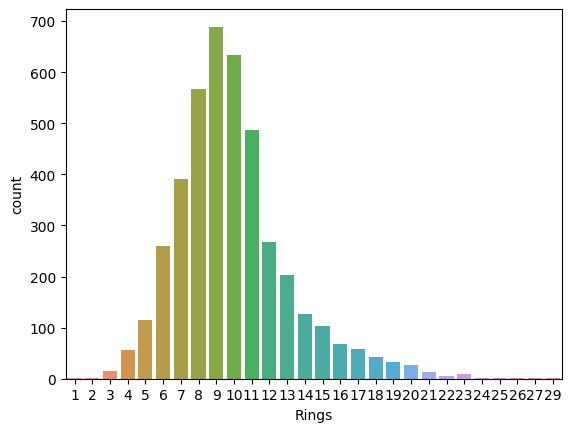

In [34]:
sns.countplot(data=df, x='Rings')

>#### Set Treshold of 20 for rings
>###### Anything above 20 rings should be set to 20 rings. Anything less should be maintained

In [35]:
df.loc[df['Rings'] <=20, "Rings"] = df['Rings']
df.loc[df['Rings'] >20, "Rings"] = 20
print(df)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

>#### Use entries with rings between 8 and 11

In [36]:
df = df[df['Rings'].between(8,11)]
print(df)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
5      I   0.425     0.300   0.095        0.3515          0.1410   
8      M   0.475     0.370   0.125        0.5095          0.2165   
11     M   0.430     0.350   0.110        0.4060          0.1675   
...   ..     ...       ...     ...           ...             ...   
4171   M   0.560     0.430   0.155        0.8675          0.4000   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   

      Viscera weight  Shell weight  Rings  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
5             0.0775        0.1200      8  
8      

>#### Create new feature called Shell volume

In [37]:
df['Shell volume'] = df['Length']*df['Height']*df['Diameter']

## View the structure and datatypes of the dataset

In [38]:
#df_adults.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2378 entries, 2 to 4175
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             2378 non-null   object 
 1   Length          2378 non-null   float64
 2   Diameter        2378 non-null   float64
 3   Height          2378 non-null   float64
 4   Whole weight    2378 non-null   float64
 5   Shucked weight  2378 non-null   float64
 6   Viscera weight  2378 non-null   float64
 7   Shell weight    2378 non-null   float64
 8   Rings           2378 non-null   int64  
 9   Shell volume    2378 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 204.4+ KB


## View statistical information about the data

In [39]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Shell volume
count,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000
mean,0.553534,0.431274,0.146165,0.902841,0.405015,0.198673,0.252139,9.437342,0.037804
std,0.090847,0.074691,0.036689,0.425292,0.204874,0.097633,0.110330,1.064824,0.018456
min,0.255000,0.195000,0.000000,0.080000,0.031500,0.013500,0.027000,8.000000,0.000000
25%,0.495000,0.380000,0.125000,0.577125,0.248000,0.123625,0.169000,9.000000,0.023697
50%,0.565000,0.440000,0.145000,0.873000,0.388750,0.188500,0.246000,9.000000,0.036540
75%,0.620000,0.485000,0.165000,1.179375,0.533000,0.261500,0.322000,10.000000,0.049812
max,0.780000,0.630000,1.130000,2.657000,1.488000,0.574500,0.678500,11.000000,0.205137


## Check for null fields in the dataset

In [42]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Shell volume      0
dtype: int64

## Check for Missing values

In [44]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Shell volume      0
dtype: int64

## Encode the categorical feature (Sex)

In [45]:
df['Sex'] = df['Sex'].map({"M":0,"F":1,"I":2})
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Shell volume
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.030051
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.020075
5,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0.012113
8,0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,0.021969
11,0,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,0.016555


In [46]:
# Use YData profiling tool to profile the data
profile_report = ProfileReport(df, minimal = False)
profile_report.to_file("abalone_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Visualizations using Seaborn
>#### Visualize Sex Distribution



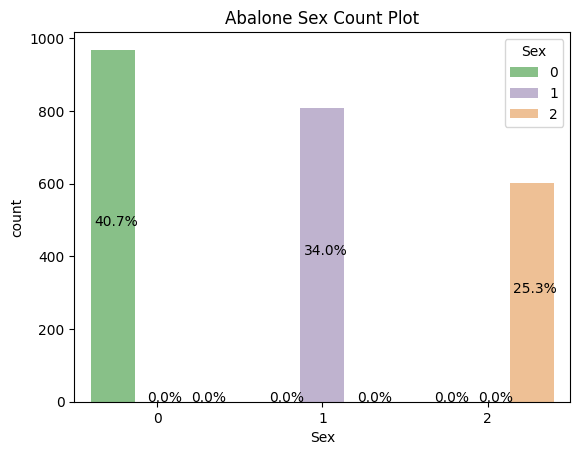

In [47]:
# Create a countplot of the "Sex" column.
ax = sns.countplot(data=df, x="Sex", hue="Sex",palette='Accent')

# Set the title of the plot.
ax.set_title("Abalone Sex Count Plot")

# Calculate the total number of observations.
total = len(df['Sex'])

# Loop through each bar in the plot.
for p in ax.patches:
    # Calculate the percentage of observations for the current bar.
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)

    # Calculate the x-coordinate for the percentage text.
    x = p.get_x() + p.get_width() + 0.02

    # Calculate the y-coordinate for the percentage text.
    y = p.get_y() + p.get_height()/2

    # Add the percentage text to the plot.
    ax.annotate(percentage, (x, y),ha='right')

# Display the plot.
plt.show()

>#### Histplot for Abalone Dataset

[Text(0.5, 1.0, 'Hist Plot of Abalone Rings')]

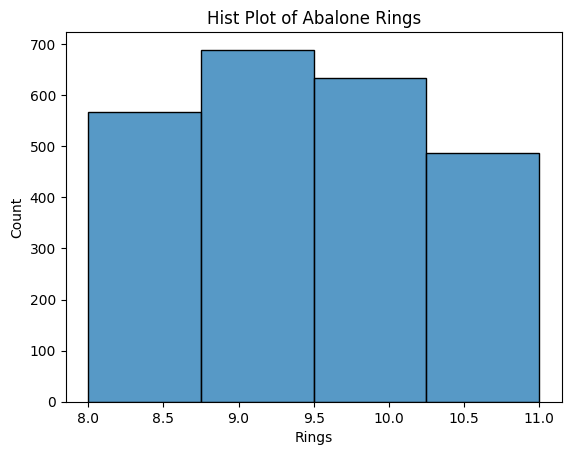

In [49]:
sns.histplot(df['Rings'],bins=4).set(title="Hist Plot of Abalone Rings")


>#### Boxplot of Abalone Rings

[Text(0.5, 1.0, 'Boxplot of Abalone Rings')]

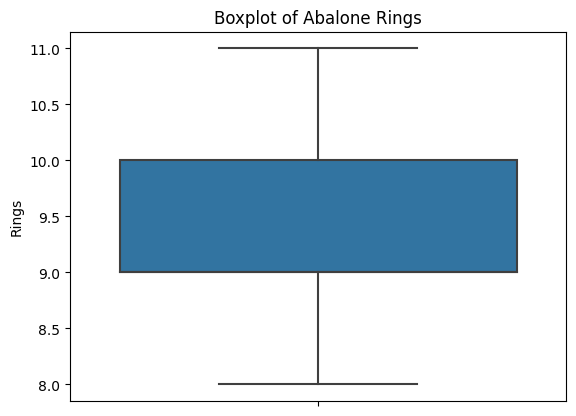

In [52]:
sns.boxplot(data=df, y='Rings').set(title="Boxplot of Abalone Rings")

>#### Heatmap Plot

[Text(0.5, 1.0, 'Abalone Dataset Heatmap')]

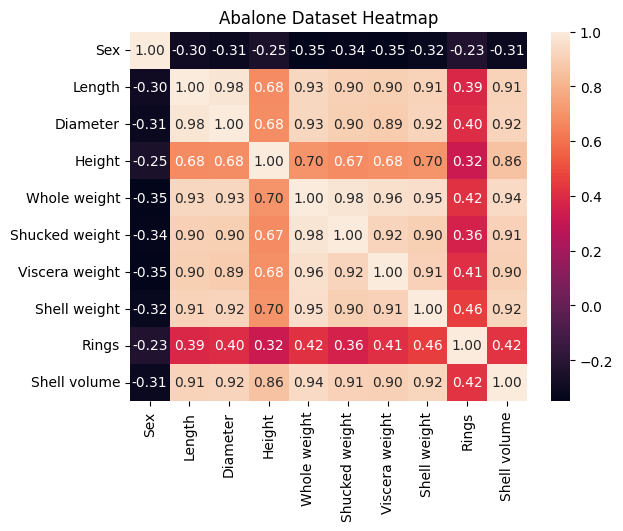

In [53]:
sns.heatmap(df.corr(),annot=True,fmt=".2f").set(title="Abalone Dataset Heatmap")

>#### Scatterplot of Abalone Length versus Rings(Age)

<Axes: xlabel='Diameter', ylabel='Rings'>

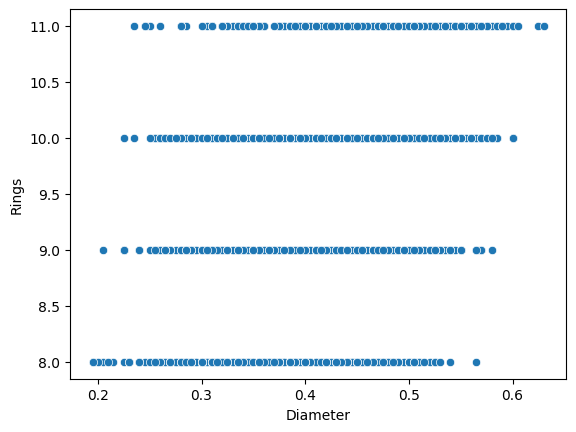

In [54]:
sns.scatterplot(data=df, x='Diameter', y='Rings')

>#### Data Visualization with Plotly

In [55]:
# Plotly histogram
fig = px.scatter(
   df,
   x='Shell weight',
   y='Length',
   title = "Scatter plot of Shell weight versus Length",
   color = 'Sex',
   width = 600,
   height = 600,
)

fig.show()

## Define Training/Test Data

In [56]:
y=df['Rings']

X = df.drop(['Rings'], axis=1) # Define the features column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) # Split data into test and train. Test data is 30% of entire data
#print(X.shape)
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Shell volume
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0.030051
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.020075
5,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0.012113
8,0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,0.021969
11,0,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,0.016555


>#### Standardize the data

In [57]:
sc = StandardScaler()
X_train_standard = sc.fit_transform(X_train)
X_test_standard = sc.fit_transform(X_test)


>#### Logistic Regresstion Model

In [58]:
clf = LogisticRegression(random_state=0,solver='lbfgs', max_iter=30000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=30000, random_state=0)

In [60]:
clf.score(X_train,y_train)

0.3955119214586255

In [63]:
clf.score(X_test,y_test) # Was able to get it from 24% to 30.7%% after selecting target class with higher instances per class

0.3067226890756303

>#### Decision Tree Classifier Model

In [65]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
clf.score(X_train,y_train)

1.0

In [67]:

clf.score(X_test,y_test) # Was able to get it from 21% to 30% after selecting target class with higher instances per class

0.3067226890756303

>#### Random Forest Model

In [68]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [84]:
clf.score(X_train,y_train)

1.0

In [71]:
clf.score(X_test,y_test) # Was able to get it from 27% to 38.9% after selecting target class with higher instances per class

0.3897058823529412

In [73]:
pipelines = {
   "StandardScaler_LogisticRegression": Pipeline([
       ("scaler", StandardScaler()),
       ("classifier", LogisticRegression(random_state=42,solver='lbfgs', max_iter=30000))
   ]),
   "RobustScaler_LogisticRegression": Pipeline([
       ("scaler", RobustScaler()),
       ("classifier", LogisticRegression(random_state=42,solver='lbfgs', max_iter=30000))
   ]),
   "StandardScaler_RandomForestClassifier": Pipeline([
       ("scaler", StandardScaler()),
       ("classifier", RandomForestClassifier())
   ]),
   "RobustScaler_RandomForestClassifier": Pipeline([
       ("scaler", RobustScaler()),
       ("classifier", RandomForestClassifier())
   ]),
   "StandardScaler_DecisionTreeClassifier": Pipeline([
       ("scaler", StandardScaler()),
       ("classifier", DecisionTreeClassifier(random_state=42))
   ]),
   "RobustScaler_DecisionTreeClassifier": Pipeline([
       ("scaler", RobustScaler()),
       ("classifier", DecisionTreeClassifier(random_state=42))

   ])
}

In [75]:
pipelines.get("RobustScaler_RandomForestClassifier").fit(X_train,y_train).score(X_test,y_test) # Increases from 38.9% to 39.4%

0.3939075630252101

In [76]:
pipelines.get("StandardScaler_LogisticRegression").fit(X_train,y_train).score(X_test,y_test) # Increases from 39.5% to 41.5%

0.41491596638655465

In [77]:
pipelines.get("RobustScaler_LogisticRegression").fit(X_train,y_train).score(X_test,y_test) # Increases from  21.1 to 41.4%

0.41386554621848737

In [79]:
pipelines.get("StandardScaler_DecisionTreeClassifier").fit(X_train,y_train).score(X_test,y_test) # No change

0.30357142857142855

In [80]:
pipelines.get("RobustScaler_DecisionTreeClassifier").fit(X_train,y_train).score(X_test,y_test) # No change

0.30357142857142855

AttributeError: 'Pipeline' object has no attribute 'f2_score'